In [1]:
import os
import pandas as pd
import numpy as np

os.chdir('../spatialdm/')
from main import *
from plottings import *

In [2]:
datadir = '/home/yoyo/1_spatial/8_intestine/FINDer/csvs/'

In [3]:
os.listdir(datadir)

['A2_tissue_positions_list.csv',
 'A3.csv',
 'A7.csv',
 'A8.csv',
 'A1.csv',
 'A4_tissue_positions_list.csv',
 'A8_tissue_positions_list.csv',
 'A8exp.csv',
 'A9_tissue_positions_list.csv',
 'A2.csv',
 'A6.csv',
 'A6_tissue_positions_list.csv',
 'A4.csv',
 'A7_tissue_positions_list.csv',
 'A9.csv',
 'A3_tissue_positions_list.csv',
 'A1_tissue_positions_list.csv']

In [31]:
data=['A1','A2','A3','A4','A6','A7','A8','A9']

In [32]:
createVar = locals()
for d in data:
    exp = pd.read_csv(os.path.join(datadir,'{}.csv'.format(d)), header=0, index_col=0)
    spatial = pd.read_csv(os.path.join(datadir,'{}_tissue_positions_list.csv'.format(d)),
                          header=None, index_col=0)
    spatial = spatial.loc[spatial[1]==1,[4,5]]
    spatial.columns = ['y','x']
    spatial.y = -spatial.y
    createVar[d] = SpatialDM(exp, spatial)     # load spatial data
    print(d + ' done!')

A1 done!
A2 done!
A3 done!
A4 done!
A6 done!
A7 done!
A8 done!
A9 done!


In [33]:
exp.head()

,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.4,AL732372.1,OR4F29,AC114498.1,...,AC007325.2,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231C
CGTGCCCGACATTTGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GTATCTCCCTAACTGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATTTGCCTAGTTACGA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACGTCCTAAACGAGAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CTGGGATCGCCCAGAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
spatial.head()

,x,y
0,,
CGTGCCCGACATTTGT-1,1170,4951
GTATCTCCCTAACTGT-1,1071,5007
ATTTGCCTAGTTACGA-1,1169,5065
ACGTCCTAAACGAGAT-1,1070,5121
CTGGGATCGCCCAGAT-1,1169,5178


In [144]:
samples = [A1,A2,A3,A4,A6,A7,A8,A9]

In [ ]:
for sample in samples:
    sample.weight_matrix(l=75, cutoff=0.2, single_cell=False) # weight_matrix by rbf kernel

    sample.extract_lr('human', '/home/yoyo/1_spatial', min_cell=10)      # find overlapping LRs from CellChatDB

    sample.spatialdm_global(100, select_num=None, method='z-score',nproc=50)     # global Moran selection

    sample.sig_pairs(method='z-score', fdr=True, threshold=0.1)     # select significant pairs

    sample.spatialdm_local(n_perm=100, method='z-score', select_num=None, nproc=50)     # local spot selection
    sample.sig_spots(method='z-score', fdr=False, threshold=0.1)     # significant local spots

In [ ]:
data_dir='/home/yoyo/1_spatial/1_Tumor/git_rep/SpatialDM/tutorial/output/'
for sample,d in zip(samples, data):
    sample.save_spataildm(os.path.join(data_dir, d))

In [210]:
def concat_db(samples):
    db=pd.DataFrame({'ligand':np.hstack([sample.ligand for sample in samples]),
                 'receptor':np.hstack([sample.receptor for sample in samples])},
                index=np.hstack([sample.ind for sample in samples]))
    db=db[~db.index.duplicated()]
    return db

In [211]:
concat=concat_obj(samples, data, 'z-score', fdr=False)

In [215]:
conditions = np.hstack((np.repeat([1],2), np.repeat([0],4)))
subset = ['A1', 'A2', 'A3', 'A4', 'A8', 'A9']

In [216]:
concat.differential_test(subset, conditions)

/home/yoyo/miniconda2/envs/CC/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/tmp/ipykernel_51959/437067795.py:64: RuntimeWarning: invalid value encountered in double_scalars
  LR_statistic[i] = -2*(reduced_ll-full_ll)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

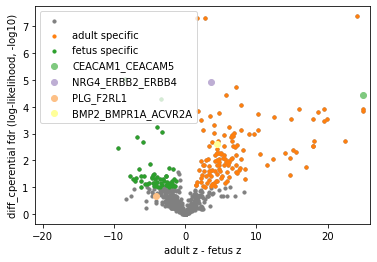

In [282]:
volcano(concat, pairs=['CEACAM1_CEACAM5', 'NRG4_ERBB2_ERBB4', 'PLG_F2RL1','BMP2_BMPR1A_ACVR2A'], legend=['adult specific', 'fetus specific'], 
        xmax = 25, xmin = -20, diff_quantile1 = 0.7, diff_quantile2 = 0.3, fdr_co = 0.1)
plt.savefig('../tutorial/volcano.pdf')

In [313]:
group_differential_pairs(concat, 'adult', 'fetus')

In [334]:
compute_pathway(concat, ls=concat.adult_specific.values, path_name = 'adult_specific_pathways')

compute_pathway(concat, ls=concat.fetus_specific.values, path_name = 'fetus_specific_pathways')

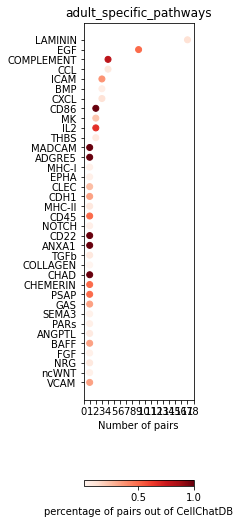

In [339]:
dot_path(concat, 'adult_specific_pathways', figsize=(3,8))

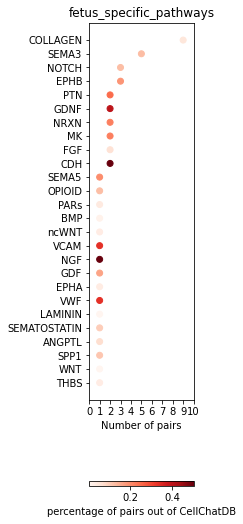

In [341]:
dot_path(concat, 'fetus_specific_pathways', figsize=(3,8))

In [342]:
# plot_pairs(A1, ['CEACAM1_CEACAM5'])